In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import davies_bouldin_score, adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [6]:
X = pd.read_excel('/content/drive/MyDrive/ЛР3. Исходные данные.xlsx')
n = len(X.index) # n - кол-во объектов
X.head()

,х1,х2,х3,х4,х5,х6,x7,x8,x9
0,7.0,15.9,8.2,5.1,13.8,229,172,20.0,2104
1,7.2,18.2,7.4,6.1,14.3,146,167,29.1,2489
2,7.9,19.7,6.4,4.7,19.8,174,144,22.8,2428
3,7.7,20.8,6.9,5.2,17.1,128,111,42.7,2494
4,9.2,15.9,7.8,5.3,16.7,169,148,22.7,2094


In [7]:
# Нормирование данных (Z-нормализация)

mean = np.mean(X, axis=0)
stddev = np.std(X, axis=0)
norm_X = (X - mean) / stddev

norm_X.head()

,х1,х2,х3,х4,х5,х6,x7,x8,x9
0,-1.025937,0.495203,1.763429,0.451789,-1.299494,1.121916,0.376805,-1.040047,0.288039
1,-0.954255,1.323542,0.415279,1.318235,-1.167518,-0.274620,0.249229,-0.276237,0.867287
2,-0.703371,1.863763,-1.269910,0.105211,0.284220,0.196501,-0.337621,-0.805029,0.775510
3,-0.775053,2.259925,-0.427316,0.538434,-0.428451,-0.577483,-1.179623,0.865282,0.874809
4,-0.237444,0.495203,1.089354,0.625079,-0.534032,0.112372,-0.235560,-0.813422,0.272993


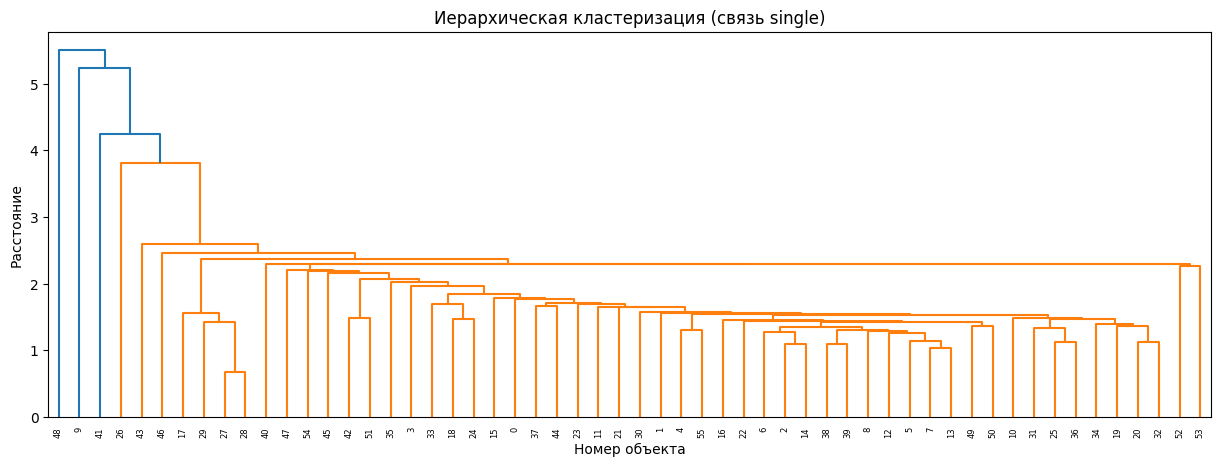

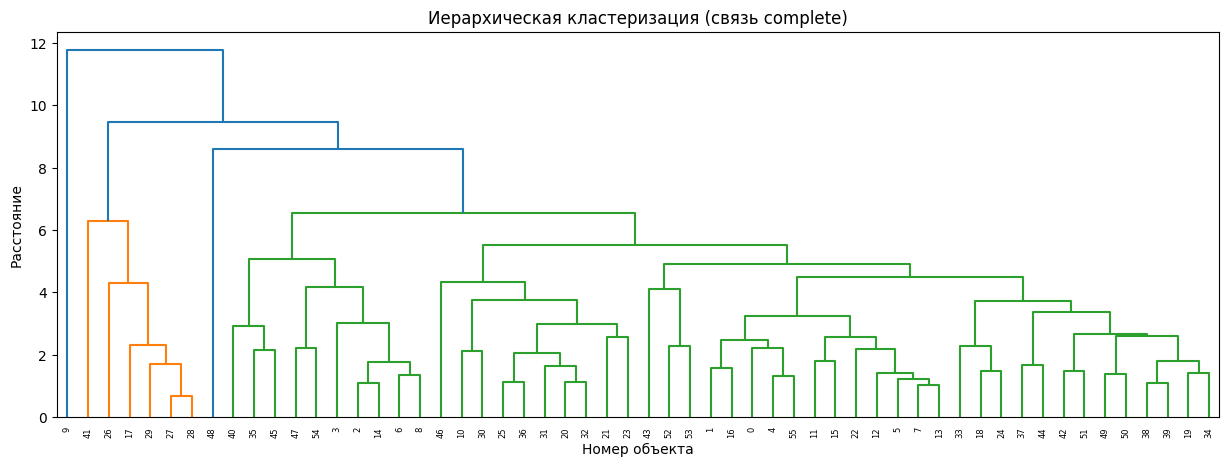

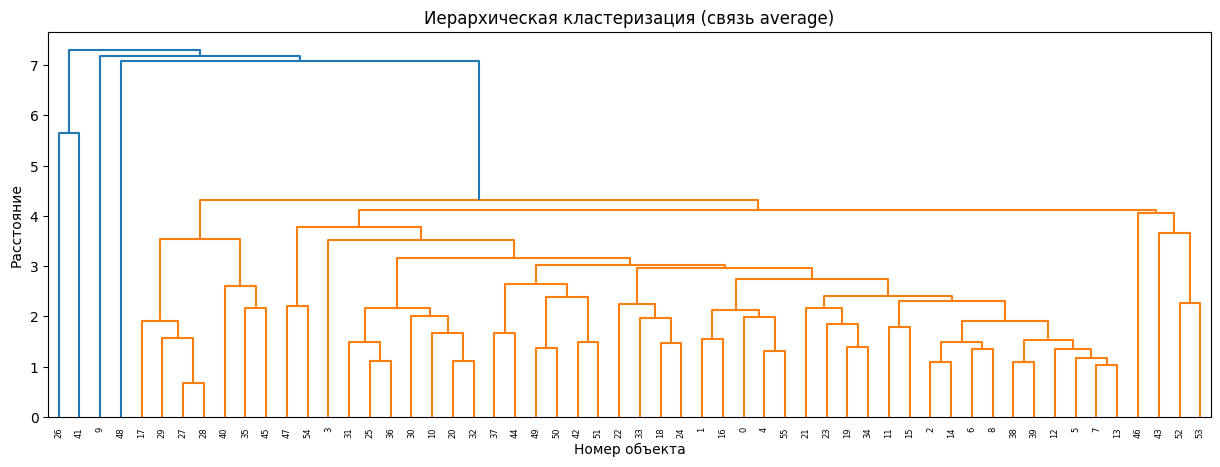

In [8]:
linkage_methods = ['single', 'complete', 'average'] # ближ.сосед, дал.сосед, между центрами кластеров
for linkage_method in linkage_methods:
    # Строим дендрограмму
    Z = linkage(norm_X, method=linkage_method)
    plt.figure(figsize=(15, 5))
    dendrogram(Z)
    plt.title(f'Иерархическая кластеризация (связь {linkage_method})')
    plt.xlabel('Номер объекта')
    plt.ylabel('Расстояние')
    plt.show()

In [12]:
model = AgglomerativeClustering(n_clusters=4, linkage='complete')
complete_labels = model.fit_predict(norm_X)
complete_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [13]:
def davies_bouldin_scorer(estimator, X):
    estimator.fit(X)
    return davies_bouldin_score(X, estimator.labels_)

kmeans = KMeans(n_init=10, random_state=42)
param_grid = {'n_clusters': range(2,11)}
grid_search = GridSearchCV(kmeans, param_grid, scoring=davies_bouldin_scorer)

# Перебираем по сетке
grid_search.fit(norm_X)

# Получаем оптимальное число кластеров
optimal_clusters = grid_search.best_params_['n_clusters']
print("Оптимальное число кластеров: ", optimal_clusters)

best_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = best_kmeans.fit_predict(norm_X)

print("Метки кластеров: ", kmeans_labels)

Оптимальное число кластеров:  3
Метки кластеров:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 0 1 1 0 1 0 2 2 2 2 0 0 0 0 1 0 0
 1 1 1 2 2 1 1 1 2 0 0 0 1 1 0 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
rand_index = adjusted_rand_score(complete_labels, kmeans_labels)
rand_index

0.28834581065334336

In [19]:
data_with_labels = norm_X.copy()
data_with_labels['Cluster'] = kmeans_labels
cluster_means = data_with_labels.groupby('Cluster').mean()
cluster_means

,х1,х2,х3,х4,х5,х6,x7,x8,x9
Cluster,,,,,,,,,
0,0.184963,-0.436036,0.740279,0.235178,0.783844,-0.364758,-0.272011,0.317305,-0.310123
1,-0.499923,0.462366,-0.144799,0.240275,-0.293370,0.362284,0.397818,-0.546804,0.233079
2,1.800989,-1.201992,-0.680094,-1.432729,-0.124906,-0.901379,-1.214707,1.768635,-0.447869
